

> 노션 교안과 완전히 똑같지는 않습니다. 코드의 주요 구성과 흐름은 같으나, 코랩에서 필요한 일부 코드(한글폰트설치 등)나 주석은 노션에 포함되어있지 않습니다.

<a href="https://www.notion.so/teamsparta/9024d2f9ad1c4f668b5e20190e5c6d1d?pvs=4">노션교안링크</a>




# **2. 정리된 재무제표 데이터 준비하기**
- 앞선 실습에서 저장한 주가재무제표 데이터셋 불러오기
- 다루기 좋은 상태로 재무제표 데이터 정리하기

### 2-1. 시각화 준비하기

In [43]:
# 한글폰트: 설치 후 세션 재시작 필요, 재시작 후에는 이 셀 실행하지 않아도 됨
!apt-get install -y fonts-nanum -q
!fc-cache -fv -q
!rm ~/.cache/matplotlib -rf

Reading package lists...
Building dependency tree...
Reading state information...
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
fc-cache: invalid option -- 'q'
usage: fc-cache [-EfrsvVh] [-y SYSROOT] [--error-on-no-fonts] [--force|--really-force] [--sysroot=SYSROOT] [--system-only] [--verbose] [--version] [--help] [dirs]
Build font information caches in [dirs]
(all directories in font configuration by default).

  -E, --error-on-no-fonts  raise an error if no fonts in a directory
  -f, --force              scan directories with apparently valid caches
  -r, --really-force       erase all existing caches, then rescan
  -s, --system-only        scan system-wide directories only
  -y, --sysroot=SYSROOT    prepend SYSROOT to all paths for scanning
  -v, --verbose            display status information while busy
  -V, --version            display font config version and exit
  -h, --help               display this hel

In [44]:
!pip install dart-fss -q

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import dart_fss
import datetime

# Pandas 'SettingWithCopy Warning' off
pd.set_option('mode.chained_assignment',  None)

plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus']=False

# Open DART API KEY 설정
API_KEY = '4d8bc279940caf57c2a0fe3c757f881603fb482e'
dart_fss.set_api_key(api_key=API_KEY)

'4d8bc279940caf57c2a0fe3c757f881603fb482e'

기업정보 가져오기

In [46]:
corp_list = dart_fss.corp.get_corp_list()
samsung = corp_list.find_by_corp_name('삼성전자', exactly=True)[0]
corp_code = samsung.corp_code   # 기업코드
stock_code = samsung.stock_code # 종목코드

start_yr = 2021
start_dt = str(2021)+'0101'

### 2.2 구글 드라이브를 연동해서 기존 주가재무제표 데이터 로드하기

In [47]:
# 구글 드라이브 연동
from google.colab import drive
import os

drive.mount('/content/drive')
path = "/content/drive/MyDrive/temp2"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


앞서 정리해서 csv로 저장해뒀던주가재무제표 데이터셋을 로드해서 정기 재무제표만 분리하겠습니다.


In [48]:
stock_path = os.path.join(path, f"{stock_code}_{start_yr}.csv")

stock = pd.read_csv(stock_path)

# 거래일 칼럼인 Date를 기준으로 시계열데이터로 변환
stock.set_index('Date', drop=True, inplace=True)
stock.index = pd.to_datetime(stock.index)
stock

,Open,High,Low,Close,Volume,Change,재무제표기준일,자산총계,부채총계,자본총계,...,비유동자산,유동부채,비유동부채,영업수익,매출총이익,영업이익,당기순이익(손실),영업활동현금흐름,투자활동현금흐름,재무활동현금흐름
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-04,81000,84400,80200,83000,38655276,0.024691,2020-12-31,378235718000000,102287702000000,275948016000000,...,180020139000000,75604351000000,26683351000000,236806988000000,92318692000000,35993876000000,2.640783e+13,65287009000000,-53628591000000,-8327839000000
2021-01-05,81600,83900,81600,83900,35335669,0.010843,2020-12-31,378235718000000,102287702000000,275948016000000,...,180020139000000,75604351000000,26683351000000,236806988000000,92318692000000,35993876000000,2.640783e+13,65287009000000,-53628591000000,-8327839000000
2021-01-06,83300,84500,82100,82200,42089013,-0.020262,2020-12-31,378235718000000,102287702000000,275948016000000,...,180020139000000,75604351000000,26683351000000,236806988000000,92318692000000,35993876000000,2.640783e+13,65287009000000,-53628591000000,-8327839000000
2021-01-07,82800,84200,82700,82900,32644642,0.008516,2020-12-31,378235718000000,102287702000000,275948016000000,...,180020139000000,75604351000000,26683351000000,236806988000000,92318692000000,35993876000000,2.640783e+13,65287009000000,-53628591000000,-8327839000000
2021-01-08,83300,90000,83000,88800,59013307,0.071170,2020-12-31,378235718000000,102287702000000,275948016000000,...,180020139000000,75604351000000,26683351000000,236806988000000,92318692000000,35993876000000,2.640783e+13,65287009000000,-53628591000000,-8327839000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-24,79700,80900,79500,80600,15454227,0.007500,2024-03-31,470899812000000,98983688000000,371916124000000,...,262355532000000,81770355000000,17213333000000,71915601000000,26029269000000,6606009000000,6.754708e+12,11866306000000,-22010751000000,1261662000000
2024-06-25,80600,81800,80100,80800,19088458,0.002481,2024-03-31,470899812000000,98983688000000,371916124000000,...,262355532000000,81770355000000,17213333000000,71915601000000,26029269000000,6606009000000,6.754708e+12,11866306000000,-22010751000000,1261662000000
2024-06-26,80100,81400,79900,81300,17783242,0.006188,2024-03-31,470899812000000,98983688000000,371916124000000,...,262355532000000,81770355000000,17213333000000,71915601000000,26029269000000,6606009000000,6.754708e+12,11866306000000,-22010751000000,1261662000000


### 2.3 로드한 재무제표 데이터 정리하기

In [49]:
# 불러온 데이터셋에서 재무제표 데이터만 분리
annual_fs = stock.loc[:, '재무제표기준일':]

# 재무제표 기준일을 인덱스로 설정한 후 중복되는 값 삭제
annual_fs.set_index('재무제표기준일', drop=True, inplace=True)
annual_fs.index = pd.to_datetime(annual_fs.index)
annual_fs.drop_duplicates(subset=None, keep='first', inplace=True)

# 반기, 분기 보고서는 제외하고 정기 보고서만 추출
annual_fs = annual_fs[annual_fs.index.month == 12]

# 정기 재무제표 데이터 확인
annual_fs

,자산총계,부채총계,자본총계,유동자산,비유동자산,유동부채,비유동부채,영업수익,매출총이익,영업이익,당기순이익(손실),영업활동현금흐름,투자활동현금흐름,재무활동현금흐름
재무제표기준일,,,,,,,,,,,,,,
2020-12-31,378235718000000,102287702000000,275948016000000,198215579000000,180020139000000,75604351000000,26683351000000,236806988000000,92318692000000,35993876000000,2.640783e+13,65287009000000,-53628591000000,-8327839000000
2021-12-31,426621158000000,121721227000000,304899931000000,218163185000000,208457973000000,88117133000000,33604094000000,279604799000000,113193457000000,51633856000000,3.990745e+13,65105448000000,-33047763000000,-23991033000000
2022-12-31,448424507000000,93674903000000,354749604000000,218470581000000,229953926000000,78344852000000,15330051000000,302231360000000,112189590000000,43376630000000,5.565408e+13,62181346000000,-31602804000000,-19390049000000
2023-12-31,455905980000000,92228115000000,363677865000000,195936557000000,259969423000000,75719452000000,16508663000000,258935494000000,78546914000000,6566976000000,1.548710e+13,44137427000000,-16922817000000,-8593059000000


# **3. 재무제표를 분석하고 데이터 이해하기**

### 3-1. 데이터 시각화를 위한 세팅

데이터를 그래프로 그려내는 등의 시각화를 하려면 그에 맞는 라이브러리가 필요합니다.

In [50]:
import matplotlib.pyplot as plt

### 3-2. 인사이트를 발견하기 위한 도구 함수

재무데이터로 어떤 지표를 계산할 때는 두 항목의 비율을 계산해야하는 경우가 많습니다. 두 항목의 비율을 소수점 둘째자리까지 반올림한 %값으로 반환해주는 함수를 만들어둡시다!

In [51]:
def get_ratio(col1, col2):
  return round(col1 / col2, 4) * 100

이렇게 계산된 지표들을 시각화해볼 수 있어야겠죠? 그래프를 그리는 데에는 여러 세팅이 필요하지만, 일부 설정값은 같은 값으로 반복 사용되는 경우가 많습니다. 그런 설정들을 매번 작성하지 않고 하나의 함수로 압축해서 사용할 수 있도록 해보죠!

참고로 여러 데이터의 추이를 그래프로 그릴 때는 두 가지 경우가 있습니다. 두 그래프가 비슷한 y축 범위에 존재해서 같은 그래프 한 장에 그릴 수 있는 경우. 그리고 반대로 서로 단위가 달라(예를 들면 금액과 %) 서로 다른 y축을 써야하는 경우가 있죠.

이 함수에서는 그래프를 한 그래프에 그릴지 혹은 각각 따로 그릴지를 선택하는 옵션을 포함시켜봅시다.

In [52]:
def draw_grid(title, show_legend):
    plt.xlabel('년도')
    plt.ylabel('(%)')
    plt.title(title)
    if show_legend:
        plt.legend()
    plt.grid(True)

def draw_graphs(df, title, col_list, how='one'):
    if how not in ['one', 'each']:
        print("""Wrong key.
        'one' if you want datas in one graph,
        'each' if you want datas in each graph.""")
        return

    if how == 'one':
        for col in col_list:
            plt.plot(df.index.year, df[col], label=col)
        draw_grid(title, show_legend=True)
    elif how == 'each':
        plt.subplots_adjust(wspace=0.3, hspace=0.5)
        for i in range(len(col_list)):
          plt.subplot(len(col_list), len(col_list), i+1)
          plt.plot(df.index.year, df[col_list[i]], label=col_list[i])
          draw_grid(col_list[i], show_legend=False)
    plt.show()

재무제표와 구분해 발견한 지표를 저장할 데이터프레임 변수도 만들어 둡시다.

In [53]:
# 분석 자료를 저장하는 새로운 데이터프레임 생성
indicators = pd.DataFrame()
indicators.index = annual_fs.index

### 3-3. 수익성 분석

먼저 가장 중요한 기업의 매출과 순이익 등의 직접적인 매출지표의 변화를 알아봐야겠죠?

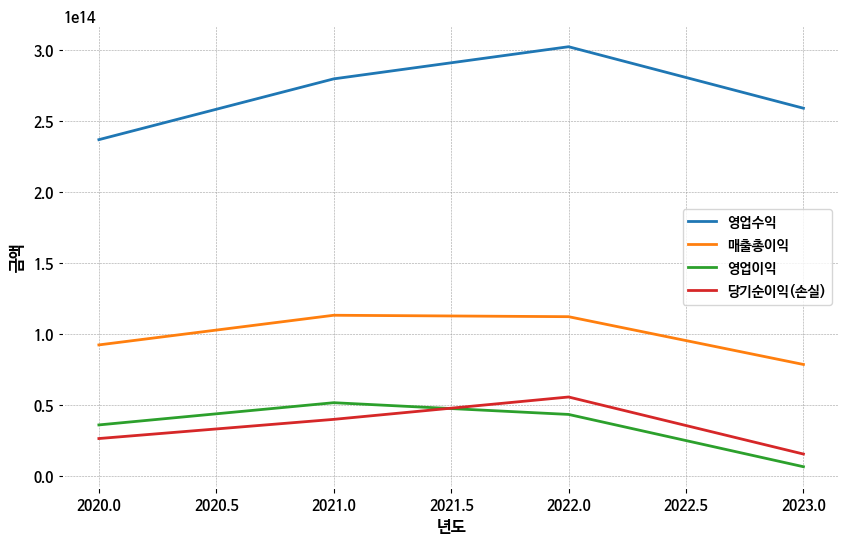

In [54]:
# 그래프로 나타내고 싶은 항목들. 모든 항목을 그려보고 싶다면 annual_fs.columns 할당
features_to_plot = ['영업수익', '매출총이익', '영업이익', '당기순이익(손실)']
# 날짜 데이터에서 년도만 가져오기
dates_list = annual_fs.index.year.tolist()

plt.figure(figsize=(10, 6))

for feature in features_to_plot:
  plt.plot(dates_list, annual_fs[feature], label=feature)

plt.xlabel('년도')
plt.ylabel('금액')
plt.legend()
plt.grid(True)
plt.show()

순이익률(NPM)
- 순이익 / 매출액
- 기업이 얼마나 효율적으로 이익을 창출하는지

영업이익률(OPM)
- 영업이익 / 매출액
- 기업의 영업활동이 얼마나 효율적인지

In [55]:
indicators['순이익률(NPM)'] = get_ratio(annual_fs['당기순이익(손실)'], annual_fs['영업수익'])
indicators['영업이익률(OM)'] = get_ratio(annual_fs['영업이익'], annual_fs['영업수익'])

indicators

,순이익률(NPM),영업이익률(OM)
재무제표기준일,,
2020-12-31,11.15,15.20
2021-12-31,14.27,18.47
2022-12-31,18.41,14.35
2023-12-31,5.98,2.54


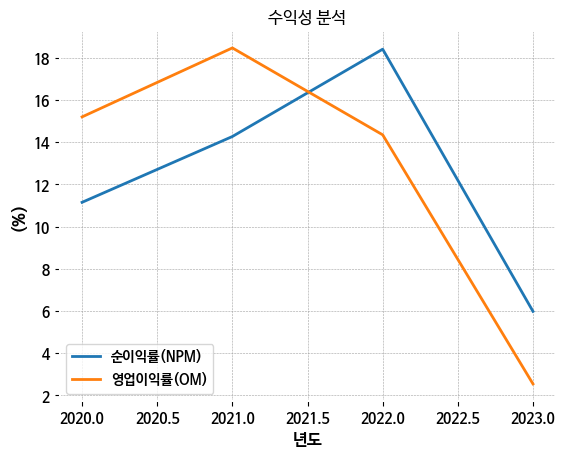

In [56]:
draw_graphs(indicators, '수익성 분석', ['순이익률(NPM)', '영업이익률(OM)'], 'one')

### 3-4. 자산의 효율성 분석
자산회전율
- 매출액 / 총 자산
- 자산을 얼마나 효과적으로 활용하는지

자기자본이익률(ROE)
- 순이익 / 총 자본
- 투자자에게 제공되는 이익의 수준 평가

In [57]:
indicators['자산회전율'] = get_ratio(annual_fs['영업수익'], annual_fs['자산총계'])
indicators['자기자본이익률(ROE)'] = get_ratio(annual_fs['당기순이익(손실)'], annual_fs['자본총계'])
indicators

,순이익률(NPM),영업이익률(OM),자산회전율,자기자본이익률(ROE)
재무제표기준일,,,,
2020-12-31,11.15,15.20,62.61,9.57
2021-12-31,14.27,18.47,65.54,13.09
2022-12-31,18.41,14.35,67.40,15.69
2023-12-31,5.98,2.54,56.80,4.26


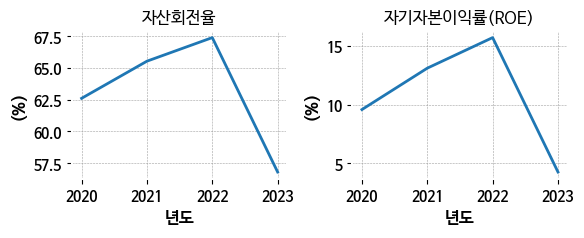

In [58]:
draw_graphs(indicators, '자산의 효율성 분석', ['자산회전율', '자기자본이익률(ROE)'], 'each')

### 3-5. 부채 관리 및 안정성 분석
부채비율(DER)
- 총 부채 / 총 자본
- 자본에 비해 부채가 어느정도인지

유동비율(CurrentRatio)
- 유동자산 / 유동부채
- 단기 부채를 상환하는 데에 활용할 수 있는 유동자산

In [59]:
indicators['부채비율'] = get_ratio(annual_fs['부채총계'], annual_fs['자본총계'])
indicators['유동비율'] = get_ratio(annual_fs['유동자산'], annual_fs['유동부채'])
indicators

,순이익률(NPM),영업이익률(OM),자산회전율,자기자본이익률(ROE),부채비율,유동비율
재무제표기준일,,,,,,
2020-12-31,11.15,15.20,62.61,9.57,37.07,262.17
2021-12-31,14.27,18.47,65.54,13.09,39.92,247.58
2022-12-31,18.41,14.35,67.40,15.69,26.41,278.86
2023-12-31,5.98,2.54,56.80,4.26,25.36,258.77


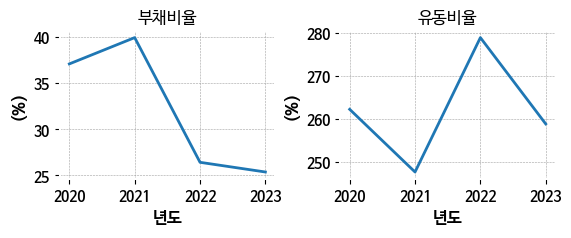

In [60]:
draw_graphs(indicators, '부채관리 및 안정성 분석', ['부채비율', '유동비율'], 'each')

### 3-6. 현금흐름 분석
영업활동현금흐름
- 기업의 자금 확보 능력 평가

투자 및 재무활동 현금흐름
- 기업의 투자 및 자금 조달 활동 이해

도구함수 draw_graphs는 비율을 그리는 함수이기 때문에 이 경우에는 사용하지 않습니다.

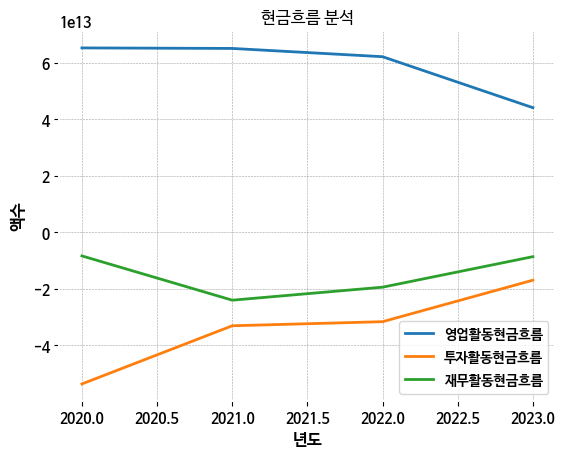

In [61]:
for col in ['영업활동현금흐름', '투자활동현금흐름', '재무활동현금흐름']:
    plt.plot(indicators.index.year, annual_fs[col], label=col)

plt.xlabel('년도')
plt.ylabel('액수')
plt.title('현금흐름 분석')
plt.legend()
plt.grid(True)
plt.show()

# **4. 주가 데이터를 분석하고 주가 예측에 도움될 수 있는 정보 찾기**

주가 데이터는 기존에 저장했던 CSV에 고스란히 들어있기 때문에, CSV를 로드한 변수 stock을 활용하겠습니다.

### 4-1. 주가 캔들차트 그리기
데이터 시각화에 활용할 라이브러리 mplfinance, seaborn을 준비하겠습니다.

In [62]:
!pip install mplfinance -q

In [63]:
import seaborn as sns
import mplfinance as mpf

주가 데이터하면 역시 캔들 차트로 한 번 봐줘야겠죠? 불러온 데이터를 캔들 차트로 시각화해봅시다. 캔들차트를 그릴 고정된 옵션들을 반복 작성하지 않도록, 간단한 함수로 만들어주겠습니다.

In [64]:
import warnings
warnings.filterwarnings('ignore')

In [65]:
def draw_candle(stock, volume=True):
  mpf.plot(stock, type='candle', style='charles', figsize=(12, 6), title='Stock Price', ylabel='Price', volume=volume)

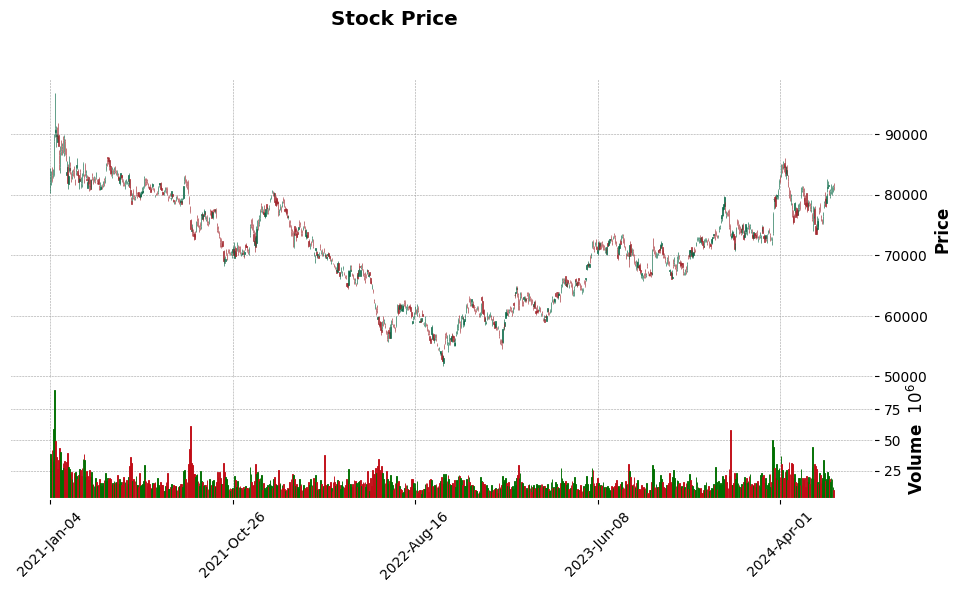

In [66]:
draw_candle(stock)

그리고나서 보니 데이터가 너무 많아 캔들이 제대로 보이지 않습니다. 간혹 데이터의 양이 너무 많다는 경고가 뜨기도 할 거에요. 조금 더 짧은 기간의 데이터만 차트로 그려봅시다.

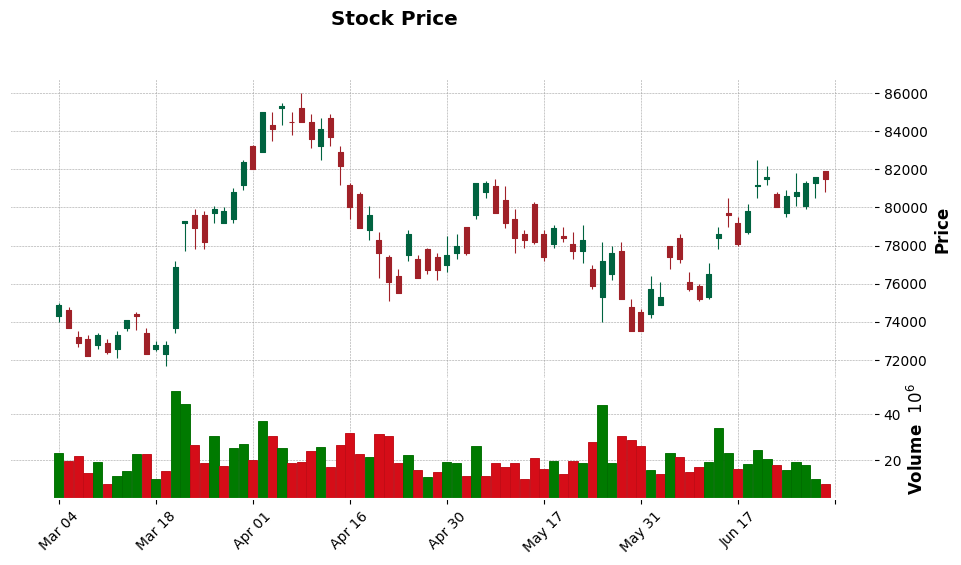

In [67]:
# 특정 기간의 캔들차트를 보고싶다면: 2024년 3월 1일부터 끝까지
draw_candle(stock.loc['20240301':])

### 4-2. 시계열 분석
시간에 따른 종가의 변화를 시각화 해보겠습니다.

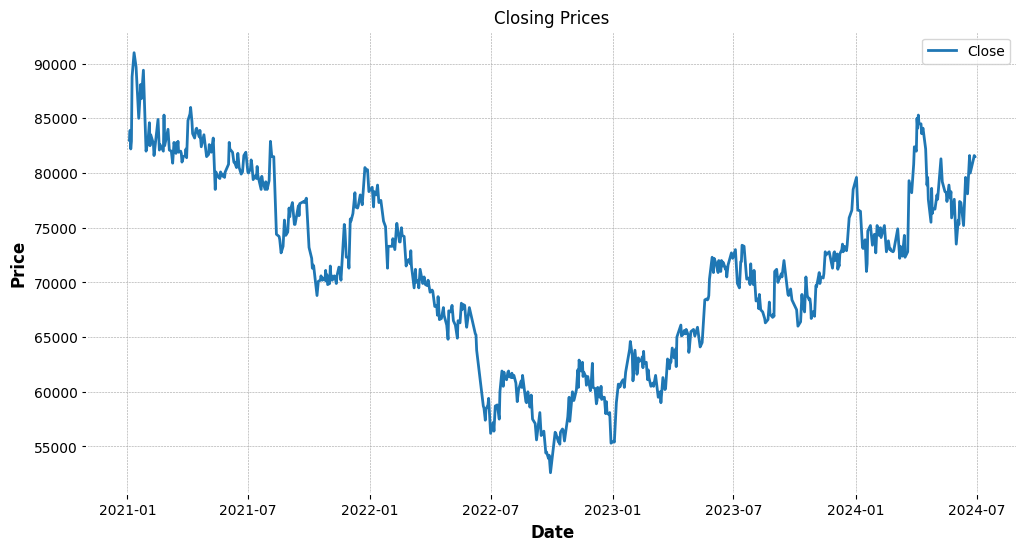

In [68]:
plt.figure(figsize=(12,6))
plt.plot(stock['Close'], label='Close')
plt.title('Closing Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

거래일마다 전일비가 어떻게 변화하는지도 알아볼까요?

In [69]:
stock.head()

,Open,High,Low,Close,Volume,Change,재무제표기준일,자산총계,부채총계,자본총계,...,비유동자산,유동부채,비유동부채,영업수익,매출총이익,영업이익,당기순이익(손실),영업활동현금흐름,투자활동현금흐름,재무활동현금흐름
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-04,81000,84400,80200,83000,38655276,0.024691,2020-12-31,378235718000000,102287702000000,275948016000000,...,180020139000000,75604351000000,26683351000000,236806988000000,92318692000000,35993876000000,2.640783e+13,65287009000000,-53628591000000,-8327839000000
2021-01-05,81600,83900,81600,83900,35335669,0.010843,2020-12-31,378235718000000,102287702000000,275948016000000,...,180020139000000,75604351000000,26683351000000,236806988000000,92318692000000,35993876000000,2.640783e+13,65287009000000,-53628591000000,-8327839000000
2021-01-06,83300,84500,82100,82200,42089013,-0.020262,2020-12-31,378235718000000,102287702000000,275948016000000,...,180020139000000,75604351000000,26683351000000,236806988000000,92318692000000,35993876000000,2.640783e+13,65287009000000,-53628591000000,-8327839000000
2021-01-07,82800,84200,82700,82900,32644642,0.008516,2020-12-31,378235718000000,102287702000000,275948016000000,...,180020139000000,75604351000000,26683351000000,236806988000000,92318692000000,35993876000000,2.640783e+13,65287009000000,-53628591000000,-8327839000000
2021-01-08,83300,90000,83000,88800,59013307,0.071170,2020-12-31,378235718000000,102287702000000,275948016000000,...,180020139000000,75604351000000,26683351000000,236806988000000,92318692000000,35993876000000,2.640783e+13,65287009000000,-53628591000000,-8327839000000


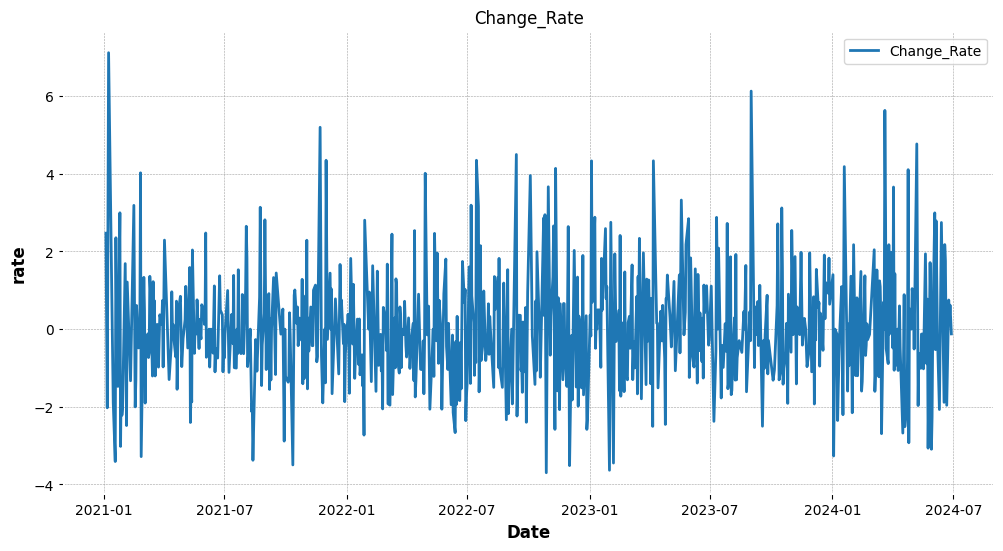

In [70]:
stock['Change_Rate'] = stock['Change'] * 100

plt.figure(figsize=(12,6))
plt.plot(stock['Change_Rate'], label='Change_Rate')
plt.title('Change_Rate')
plt.xlabel('Date')
plt.ylabel('rate')
plt.legend()
plt.show()

전일비를 볼 수는 있지만, 그 흐름 속 의미를 파악하기는 어려워 보입니다. 뭔가 조치를 취해야겠죠?

### 4-3. 전일비의 이동평균선의 이동평균선
전일비가 어떻게 변해가는지 파악하기 위해 그 이동평균선을 그려봅시다.

이동평균을 구한려면 각 시점을 기준으로 지정한 기간동안의 과거 데이터가 필요합니다.

20일을 기준으로 하는 이동평균을 구하려고 할 때 데이터의 초반에는 충분한 과거 데이터가 없기 때문에 그 값을 구할 수 없습니다. 이는 발생할 수 밖에 없는 문제이므로, 이를 인지하고 데이터 분석을 계속합니다.

In [71]:
stock['Change_MA20'] = stock['Change_Rate'].rolling(window=20).mean()
stock.head(30)

,Open,High,Low,Close,Volume,Change,재무제표기준일,자산총계,부채총계,자본총계,...,비유동부채,영업수익,매출총이익,영업이익,당기순이익(손실),영업활동현금흐름,투자활동현금흐름,재무활동현금흐름,Change_Rate,Change_MA20
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-04,81000,84400,80200,83000,38655276,0.024691,2020-12-31,378235718000000,102287702000000,275948016000000,...,26683351000000,236806988000000,92318692000000,35993876000000,2.640783e+13,65287009000000,-53628591000000,-8327839000000,2.469136,NaN
2021-01-05,81600,83900,81600,83900,35335669,0.010843,2020-12-31,378235718000000,102287702000000,275948016000000,...,26683351000000,236806988000000,92318692000000,35993876000000,2.640783e+13,65287009000000,-53628591000000,-8327839000000,1.084337,NaN
2021-01-06,83300,84500,82100,82200,42089013,-0.020262,2020-12-31,378235718000000,102287702000000,275948016000000,...,26683351000000,236806988000000,92318692000000,35993876000000,2.640783e+13,65287009000000,-53628591000000,-8327839000000,-2.026222,NaN
2021-01-07,82800,84200,82700,82900,32644642,0.008516,2020-12-31,378235718000000,102287702000000,275948016000000,...,26683351000000,236806988000000,92318692000000,35993876000000,2.640783e+13,65287009000000,-53628591000000,-8327839000000,0.851582,NaN
2021-01-08,83300,90000,83000,88800,59013307,0.071170,2020-12-31,378235718000000,102287702000000,275948016000000,...,26683351000000,236806988000000,92318692000000,35993876000000,2.640783e+13,65287009000000,-53628591000000,-8327839000000,7.117008,NaN
2021-01-11,90000,96800,89500,91000,90306177,0.024775,2020-12-31,378235718000000,102287702000000,275948016000000,...,26683351000000,236806988000000,92318692000000,35993876000000,2.640783e+13,65287009000000,-53628591000000,-8327839000000,2.477477,NaN
2021-01-12,90300,91400,87800,90600,48682416,-0.004396,2020-12-31,378235718000000,102287702000000,275948016000000,...,26683351000000,236806988000000,92318692000000,35993876000000,2.640783e+13,65287009000000,-53628591000000,-8327839000000,-0.439560,NaN
2021-01-13,89800,91200,89100,89700,36068848,-0.009934,2020-12-31,378235718000000,102287702000000,275948016000000,...,26683351000000,236806988000000,92318692000000,35993876000000,2.640783e+13,65287009000000,-53628591000000,-8327839000000,-0.993377,NaN
2021-01-14,88700,90000,88700,89700,26393970,0.000000,2020-12-31,378235718000000,102287702000000,275948016000000,...,26683351000000,236806988000000,92318692000000,35993876000000,2.640783e+13,65287009000000,-53628591000000,-8327839000000,0.000000,NaN


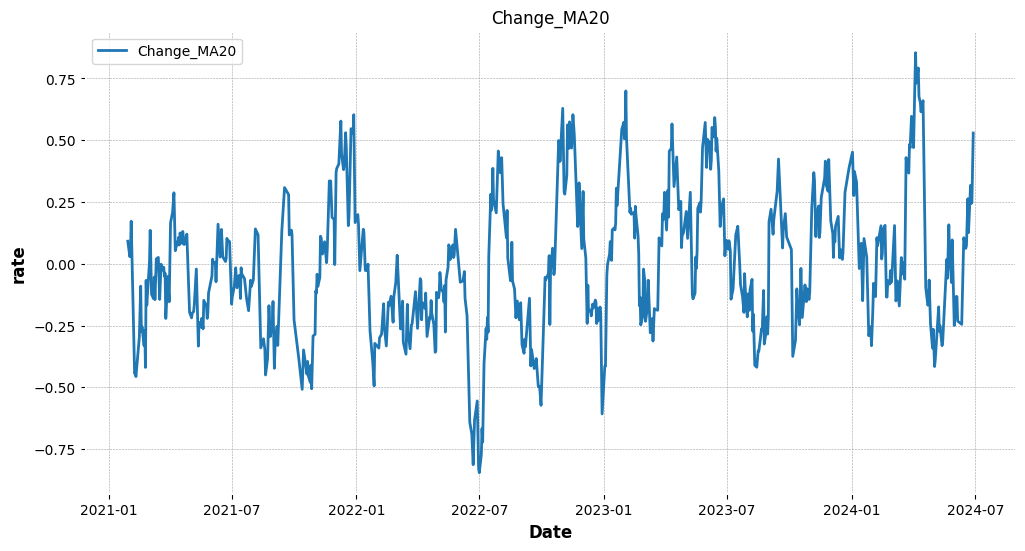

In [72]:
plt.figure(figsize=(12,6))
plt.plot(stock['Change_MA20'], label='Change_MA20')
plt.title('Change_MA20')
plt.xlabel('Date')
plt.ylabel('rate')
plt.legend()
plt.show()

전일비가 어떻게 변해오는지 파악하기 한결 쉽죠.

### 4-4. 종가의 이동평균선
단기 및 장기 이동평균선을 계산하여 주가의 전반적인 방향, 즉 트렌드를 분석합니다.

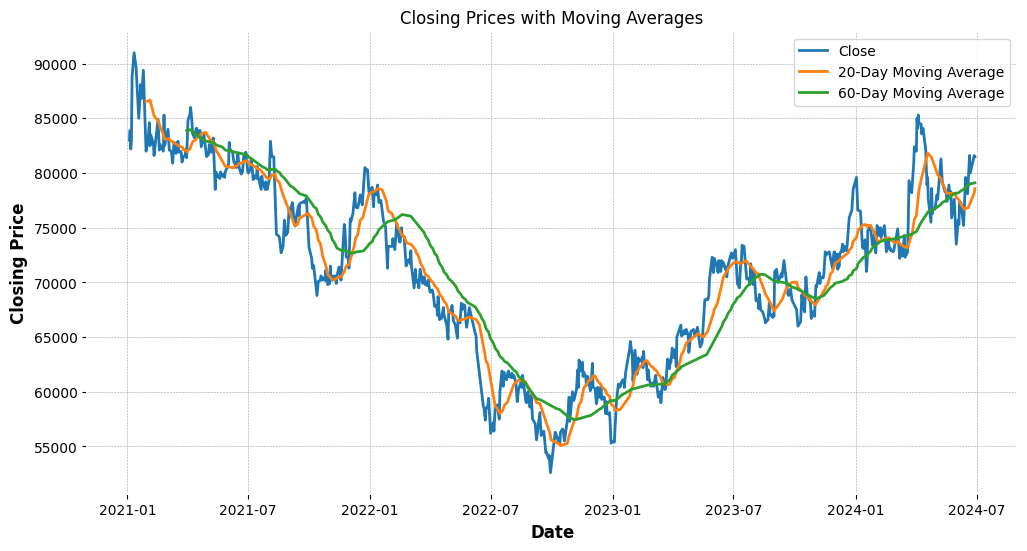

In [73]:
# 단기(20일)/장기(60일) 이동평균선을 계산해서 칼럼 추가
stock['MA20'] = stock['Close'].rolling(window=20).mean()
stock['MA60'] = stock['Close'].rolling(window=60).mean()

# 이동평균선 시각화
plt.figure(figsize=(12,6))
plt.plot(stock['Close'], label='Close')
plt.plot(stock['MA20'], label='20-Day Moving Average')
plt.plot(stock['MA60'], label='60-Day Moving Average')
plt.title('Closing Prices with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

단기 이동평균선이 장기 이동평균선을 제치고 올라가는 '골든 크로스'이후에는 확실히 주가가 상승하는 경향이 보입니다. 반대인 '데드 크로스'에서도 반대로 주가가 떨어지는 경향을 보이고 있죠?

### 4-5. 거래량 분석
주가 데이터에 포함되어 있는 거래량의 변화를 분석해서 매수/매도 신호를 찾아볼 수도 있습니다. 거래량과 종가의 변화를 비교해볼까요?

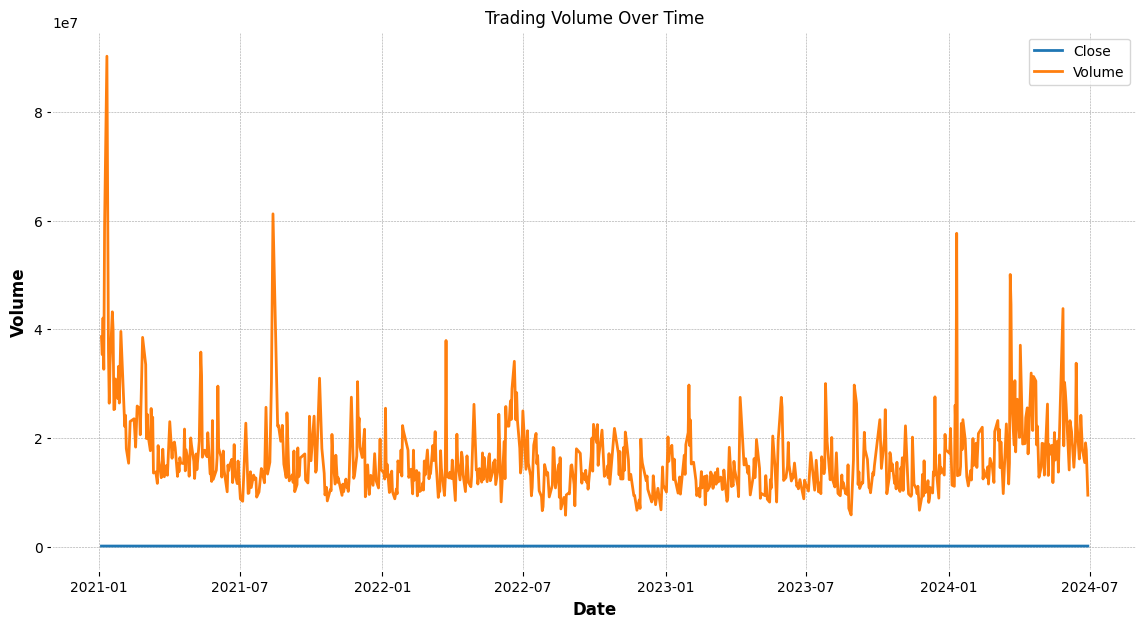

In [74]:
plt.figure(figsize=(14, 7))
# 종가 그래프
plt.plot(stock['Close'], label='Close')
# 거래량 그래프
plt.plot(stock['Volume'], label='Volume')
plt.title('Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()

거래량과 종가의 단위 자체가 다르기 때문에 두 데이터를 제대로 비교해보기 어렵습니다. 아무래도 두 개의 y축을 사용해야 할 것 같습니다.

<Figure size 1400x600 with 0 Axes>

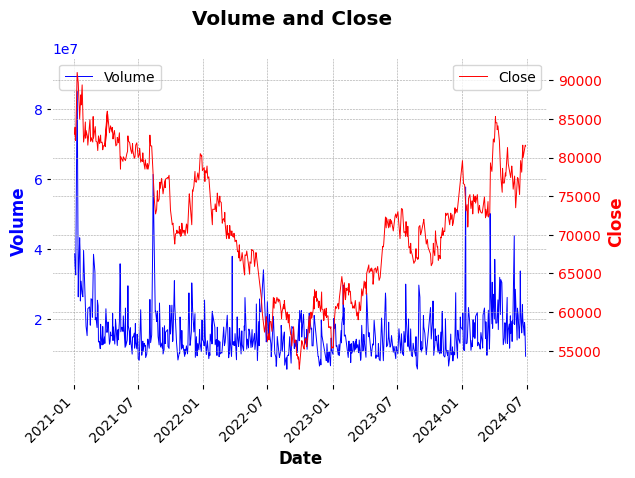

In [75]:
# 그래프 그리기
plt.figure(figsize=(14, 6))
fig, ax1 = plt.subplots()

# 첫 번째 y축 (Volume: 거래량)
ax1.plot(stock['Volume'], color='blue', label='Volume', linewidth=0.7)
ax1.set_xlabel('Date')
ax1.set_ylabel('Volume', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# 두 번째 y축 (Close: 종가)
ax2 = ax1.twinx()
ax2.plot(stock['Close'], color='red', label='Close', linewidth=0.7 )
ax2.set_ylabel('Close', color='red')
ax2.tick_params(axis='y', labelcolor='red')

fig.autofmt_xdate(rotation=45)

# 제목과 레이블 추가
fig.suptitle('Volume and Close')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

거래량과 종가를 비교해보면 2021년 초, 거래량이 급증한 것으로 봐서 많은 사람들이 이 주식에 관심을 가지기 시작한 것 같습니다.

### 4-7. 일일 수익률 계산 및 분석
주가가 하루에도 크게 오르내려서 변동성이 크다면 단기간에 큰 수익을 낼 수도 있지만, 반대로 큰 손실을 입을 수도 있습니다. 일일 수익률을 계산해서 변동률을 분석해봅시다.

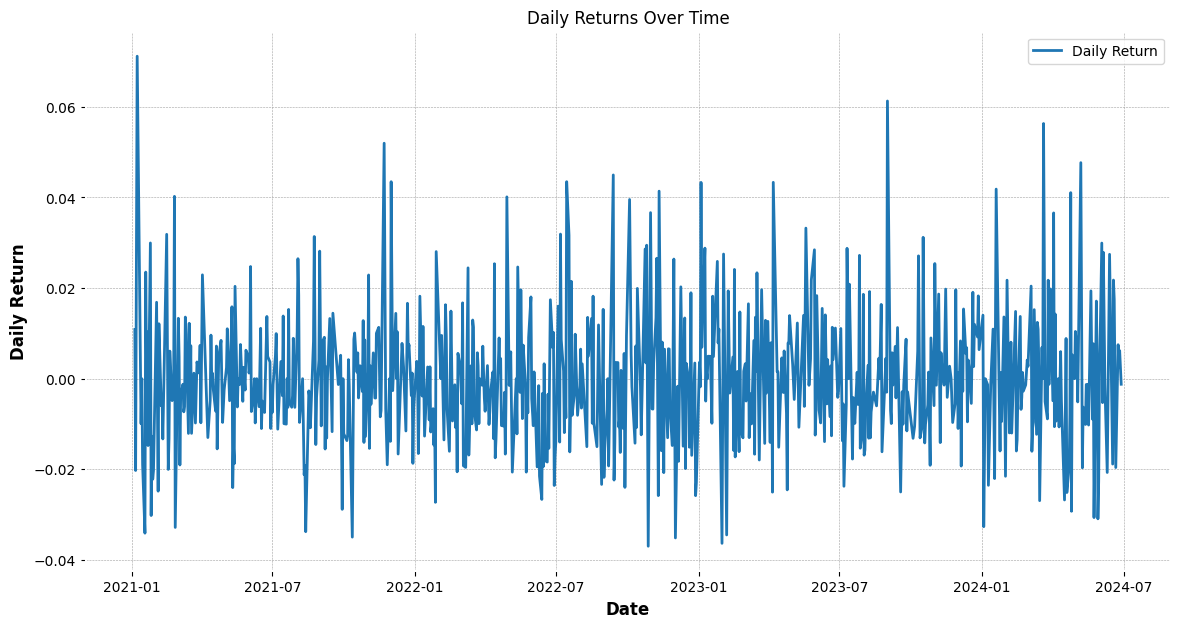

In [76]:
# 일일 수익률 계산
stock['Daily Return'] = stock['Close'].pct_change()

# 일일 수익률 시계열 그래프
plt.figure(figsize=(14, 7))
plt.plot(stock['Daily Return'], label='Daily Return')
plt.title('Daily Returns Over Time')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.legend()
plt.show()

일일 수익률이 들쭉날쭉해서 분포를 파악하기가 어려워 보입니다. 분포도를 그려서 일일 수익률이 어떻게 분포해있는지 봐야겠습니다.

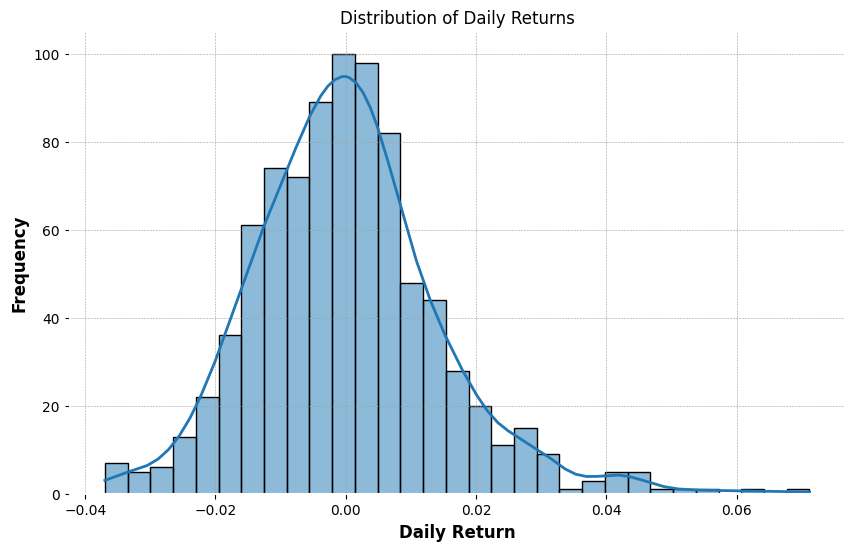

일일 수익률의 변동률 (표준편차): 0.01%


In [77]:
# 일일 수익률의 히스토그램
plt.figure(figsize=(10, 6))
sns.histplot(stock['Daily Return'].dropna(), kde=True)
plt.title('Distribution of Daily Returns')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.show()

# 일일수익률의 표준편차인 변동률 계산
volatility = stock['Daily Return'].std()
print(f"일일 수익률의 변동률 (표준편차): {volatility:.2f}%")

### 4.8 데이터 병합해서 CSV 저장하기

stock 데이터프레임에 주가데이터 지표는 포함시켜 두었으니, 재무제표의 지표들을 병합하겠습니다.

In [78]:
# stock 데이터셋에 Date 칼럼 만들기
stock.reset_index(inplace=True)

In [79]:
def get_year(x):
  return x.year

# 정기 재무제표를 기준으로 하기 때문에, 기준연도 칼럼 생성
stock['재무제표기준일'] = pd.to_datetime(stock['재무제표기준일'])
stock["재무제표기준연도"] = stock['재무제표기준일'].apply(get_year)
indicators["재무제표기준연도"] = indicators.index.year

stock = pd.merge(stock, indicators, on="재무제표기준연도", how='left')
stock

,Date,Open,High,Low,Close,Volume,Change,재무제표기준일,자산총계,부채총계,...,MA20,MA60,Daily Return,재무제표기준연도,순이익률(NPM),영업이익률(OM),자산회전율,자기자본이익률(ROE),부채비율,유동비율
0,2021-01-04,81000,84400,80200,83000,38655276,0.024691,2020-12-31,378235718000000,102287702000000,...,NaN,NaN,NaN,2020,11.15,15.2,62.61,9.57,37.07,262.17
1,2021-01-05,81600,83900,81600,83900,35335669,0.010843,2020-12-31,378235718000000,102287702000000,...,NaN,NaN,0.010843,2020,11.15,15.2,62.61,9.57,37.07,262.17
2,2021-01-06,83300,84500,82100,82200,42089013,-0.020262,2020-12-31,378235718000000,102287702000000,...,NaN,NaN,-0.020262,2020,11.15,15.2,62.61,9.57,37.07,262.17
3,2021-01-07,82800,84200,82700,82900,32644642,0.008516,2020-12-31,378235718000000,102287702000000,...,NaN,NaN,0.008516,2020,11.15,15.2,62.61,9.57,37.07,262.17
4,2021-01-08,83300,90000,83000,88800,59013307,0.071170,2020-12-31,378235718000000,102287702000000,...,NaN,NaN,0.071170,2020,11.15,15.2,62.61,9.57,37.07,262.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
855,2024-06-24,79700,80900,79500,80600,15454227,0.007500,2024-03-31,470899812000000,98983688000000,...,77480.0,79060.000000,0.007500,2024,NaN,NaN,NaN,NaN,NaN,NaN
856,2024-06-25,80600,81800,80100,80800,19088458,0.002481,2024-03-31,470899812000000,98983688000000,...,77660.0,79075.000000,0.002481,2024,NaN,NaN,NaN,NaN,NaN,NaN
857,2024-06-26,80100,81400,79900,81300,17783242,0.006188,2024-03-31,470899812000000,98983688000000,...,77845.0,79100.000000,0.006188,2024,NaN,NaN,NaN,NaN,NaN,NaN
858,2024-06-27,81300,81600,80500,81600,11739720,0.003690,2024-03-31,470899812000000,98983688000000,...,78165.0,79113.333333,0.003690,2024,NaN,NaN,NaN,NaN,NaN,NaN


재무제표의 지표는 매년 공시된 정기보고서를 바탕으로 계산되었기 때문에, 아직 한 해가 끝나지 않은 올해는 재무제표 지표를 갖지 않습니다.

완성된 데이터셋 저장

In [80]:
stock_path = os.path.join(path, f"{stock_code}_{start_yr}_indicators.csv")
stock.to_csv(stock_path, index=False)

In [81]:
pd.read_csv(stock_path)

,Date,Open,High,Low,Close,Volume,Change,재무제표기준일,자산총계,부채총계,...,MA20,MA60,Daily Return,재무제표기준연도,순이익률(NPM),영업이익률(OM),자산회전율,자기자본이익률(ROE),부채비율,유동비율
0,2021-01-04,81000,84400,80200,83000,38655276,0.024691,2020-12-31,378235718000000,102287702000000,...,NaN,NaN,NaN,2020,11.15,15.2,62.61,9.57,37.07,262.17
1,2021-01-05,81600,83900,81600,83900,35335669,0.010843,2020-12-31,378235718000000,102287702000000,...,NaN,NaN,0.010843,2020,11.15,15.2,62.61,9.57,37.07,262.17
2,2021-01-06,83300,84500,82100,82200,42089013,-0.020262,2020-12-31,378235718000000,102287702000000,...,NaN,NaN,-0.020262,2020,11.15,15.2,62.61,9.57,37.07,262.17
3,2021-01-07,82800,84200,82700,82900,32644642,0.008516,2020-12-31,378235718000000,102287702000000,...,NaN,NaN,0.008516,2020,11.15,15.2,62.61,9.57,37.07,262.17
4,2021-01-08,83300,90000,83000,88800,59013307,0.071170,2020-12-31,378235718000000,102287702000000,...,NaN,NaN,0.071170,2020,11.15,15.2,62.61,9.57,37.07,262.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
855,2024-06-24,79700,80900,79500,80600,15454227,0.007500,2024-03-31,470899812000000,98983688000000,...,77480.0,79060.000000,0.007500,2024,NaN,NaN,NaN,NaN,NaN,NaN
856,2024-06-25,80600,81800,80100,80800,19088458,0.002481,2024-03-31,470899812000000,98983688000000,...,77660.0,79075.000000,0.002481,2024,NaN,NaN,NaN,NaN,NaN,NaN
857,2024-06-26,80100,81400,79900,81300,17783242,0.006188,2024-03-31,470899812000000,98983688000000,...,77845.0,79100.000000,0.006188,2024,NaN,NaN,NaN,NaN,NaN,NaN
858,2024-06-27,81300,81600,80500,81600,11739720,0.003690,2024-03-31,470899812000000,98983688000000,...,78165.0,79113.333333,0.003690,2024,NaN,NaN,NaN,NaN,NaN,NaN
